In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("data/cat.jpg", 0)
print(img.shape)

(415, 415)


In [3]:
template = cv2.imread("data/cat_face.jpg", 0)
print(template.shape)

h, w = template.shape

(178, 212)


In [4]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

(238, 204)


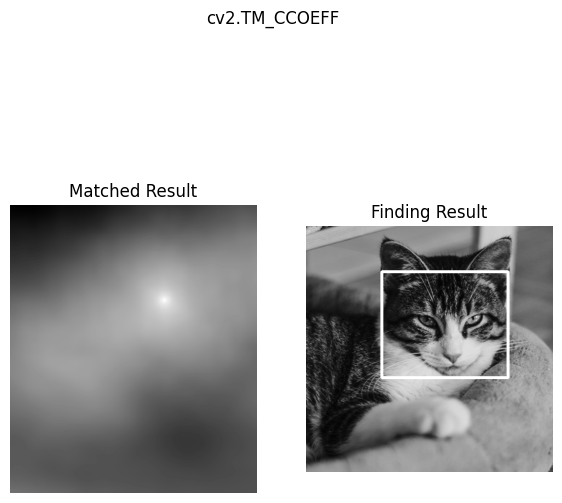

(238, 204)


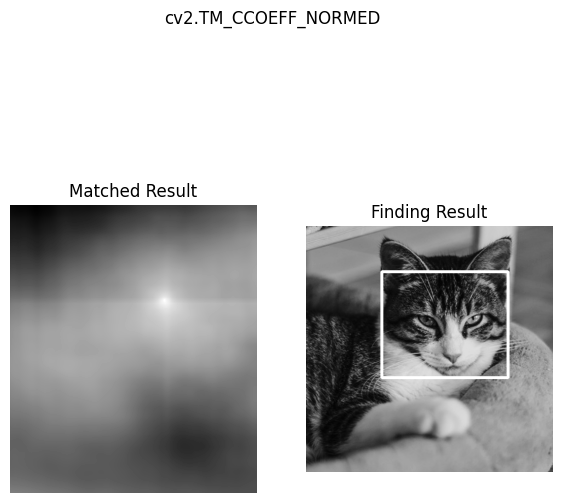

(238, 204)


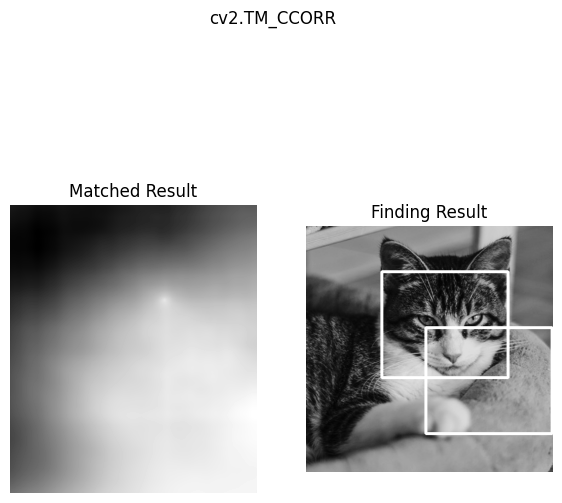

(238, 204)


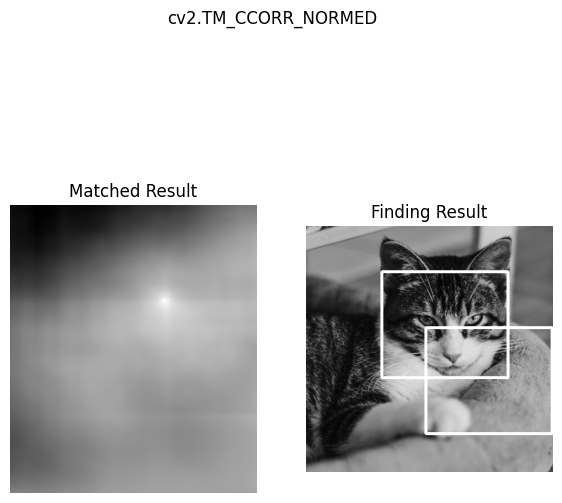

(238, 204)


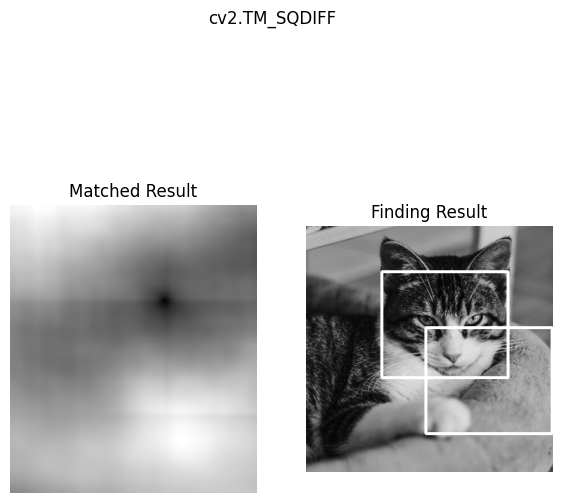

(238, 204)


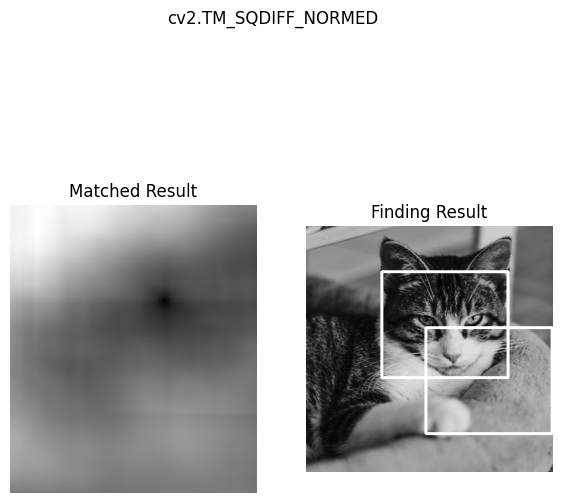

In [5]:
for meth in methods:
    
    method = eval(meth) # eval turn into string to method ('cv2.TM_CCOEFF' -> cv2.TM_CCOEFF)
    
    res = cv2.matchTemplate(image=img, templ=template, method=method)
    print(res.shape)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: # in these mothods min loc equals top left
        top_left = min_loc
    else:
        top_left = max_loc # in the other mothods max loc equals top left
        
    bottom_right = (top_left[0] + w , top_left[1] + h)
    
    cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=255, thickness=3)
    
    plt.figure(figsize=(7,7))
    plt.subplot(121), plt.imshow(res, cmap="gray"), plt.title("Matched Result"), plt.axis("off")
    plt.subplot(122), plt.imshow(img, cmap="gray"), plt.title("Finding Result"), plt.axis("off")
    plt.suptitle(meth)
    plt.show()